In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

In [5]:
df = pd.read_excel("C:/Users/Admin/Documents/SQL PROJECT/Pizza/Pizza Sales Dataset.xlsx", sheet_name ="pizza_sales")

In [6]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,weekdays,months,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,Thursday,January,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,Thursday,January,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,Thursday,January,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,Thursday,January,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,Thursday,January,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
df.shape

(48620, 14)

In [8]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'weekdays', 'months', 'order_time', 'unit_price', 'total_price',
       'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   weekdays           48620 non-null  object        
 6   months             48620 non-null  object        
 7   order_time         48620 non-null  object        
 8   unit_price         48620 non-null  float64       
 9   total_price        48620 non-null  float64       
 10  pizza_size         48620 non-null  object        
 11  pizza_category     48620 non-null  object        
 12  pizza_ingredients  48620 non-null  object        
 13  pizza_name         48620 non-null  object        
dtypes: dat

In [10]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
weekdays                     object
months                       object
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [11]:
df.describe()

,order_details_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


In [38]:
total_revenue = df['total_price'].sum()
total_pizzas_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()

avg_order_value = total_revenue / total_orders
avg_pizzas_per_order = total_pizzas_sold / total_orders

print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold}")
print(f"Total Orders: {total_orders}")
print(f"Avg Order Value: ${avg_order_value:.2f}")
print(f"Average Pizza per Order: {avg_pizzas_per_order:.2f}")


Total Revenue: $817860.05
Total Pizzas Sold: 49574
Total Orders: 21350
Avg Order Value: $38.31
Average Pizza per Order: 2.32


In [15]:
ingredient = (
    df['pizza_ingredients']          # Lấy cột chứa nguyên liệu
    .str.split(',')                  # Tách chuỗi bằng dấu phẩy thành list
    .explode()                       # Bung mỗi phần tử trong list thành 1 dòng
    .str.strip()                     # Xóa khoảng trắng thừa 2 bên
    .value_counts()                  # Đếm số lần xuất hiện của từng nguyên liệu
    .reset_index()                   # Đưa kết quả thành DataFrame thay vì Series
    .rename(columns={'index':'counts', 'pizza_ingredients':'Ingredients'})  # Đổi tên cột
)

print(ingredient.head(10))



         Ingredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


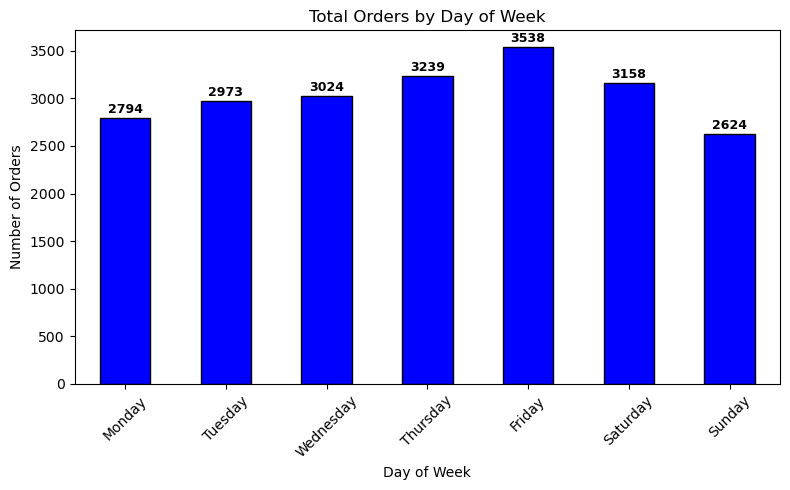

In [20]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='blue', edgecolor='black')

plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


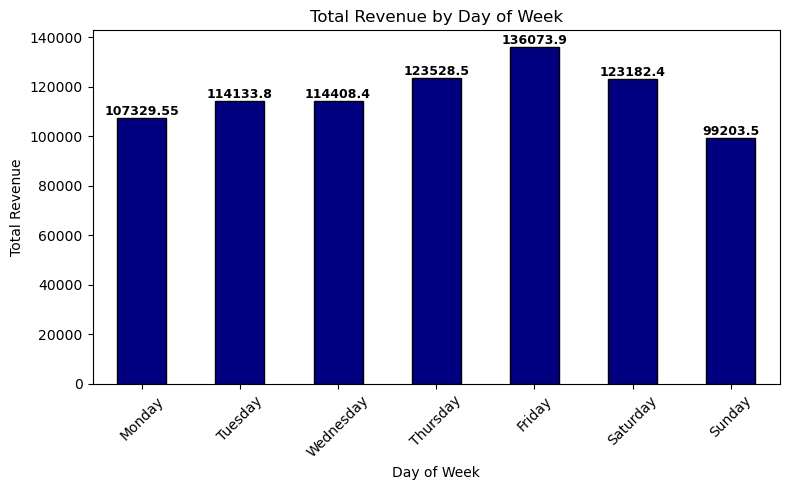

In [23]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed=False)['total_price'].sum()

ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='navy', edgecolor='black')

plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


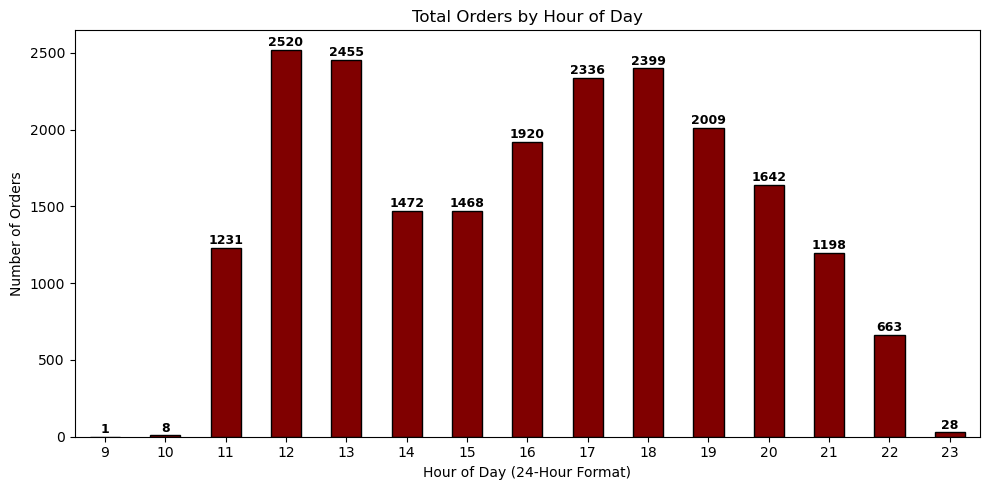

In [24]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()

ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='maroon', edgecolor='black')

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


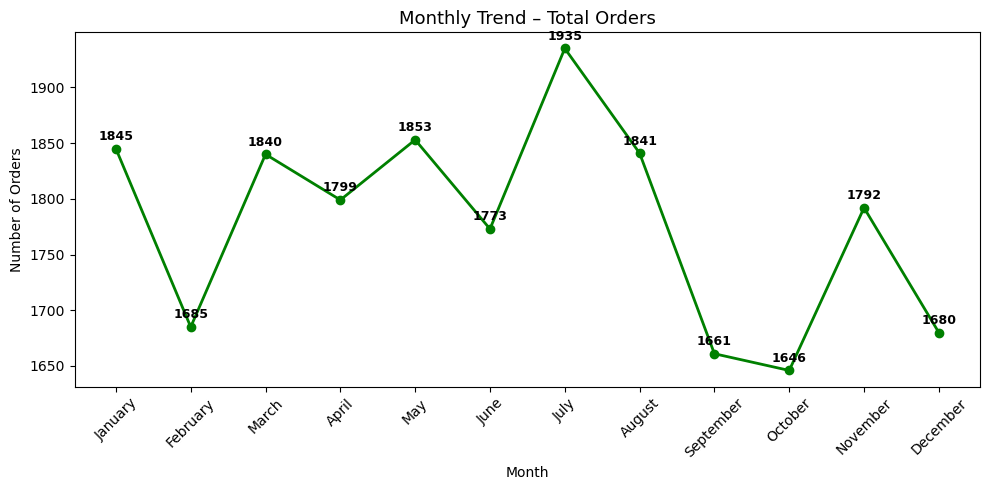

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử cột ngày là 'order_date'
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Lấy tên tháng
df['month_name'] = df['order_date'].dt.month_name()

# Đảm bảo đúng thứ tự tháng
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Đếm số đơn hàng theo tháng
orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique()

# Vẽ biểu đồ đường
plt.figure(figsize=(10,5))
plt.plot(orders_by_month.index, orders_by_month.values,
         marker='o', color='green', linewidth=2)

plt.title("Monthly Trend – Total Orders", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

# Hiển thị số lên điểm
for x, y in zip(orders_by_month.index, orders_by_month.values):
    plt.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', visible=False) 
plt.grid(axis='x', visible=False) 
plt.show()


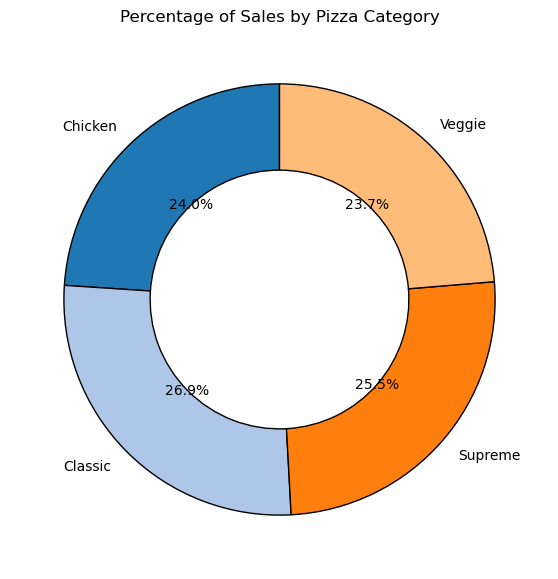

In [34]:
category_sales = df.groupby('pizza_category')['total_price'].sum()

category_pct = category_sales / category_sales.sum() * 100

plt.figure(figsize=(7,7))
colors = plt.get_cmap('tab20').colors  # nice color palette

plt.pie(
    category_pct,
    labels=category_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'width': 0.4}
)

plt.title("Percentage of Sales by Pizza Category")
plt.show()


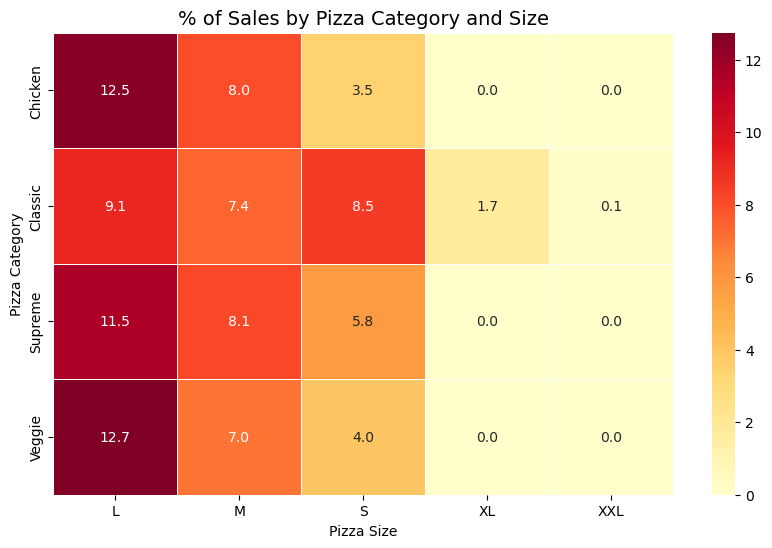

In [35]:
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(10,6))
sns.heatmap(sales_pct, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title("% of Sales by Pizza Category and Size", fontsize=14)
plt.xlabel("Pizza Size")
plt.ylabel("Pizza Category")
plt.show()


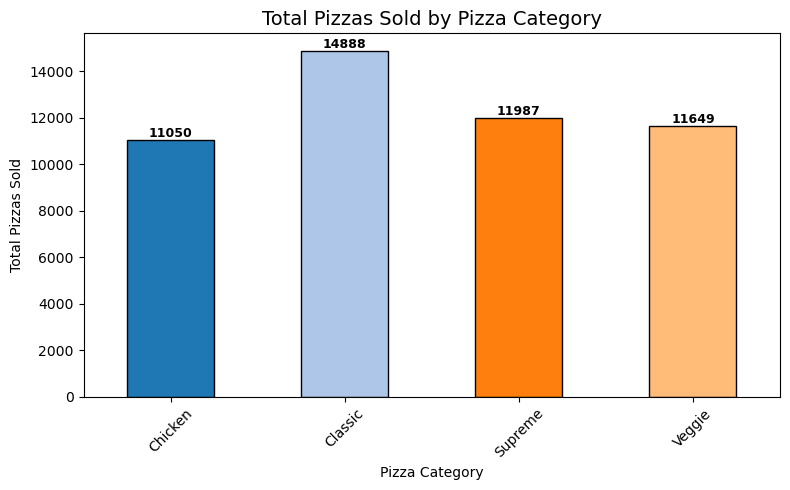

In [36]:
pizzas_by_category = df.groupby('pizza_category')['quantity'].sum()

colors = list(plt.get_cmap('tab20').colors)      # lấy bảng màu 'tab20'
colors = colors[:len(pizzas_by_category)]        # chọn số màu đúng bằng số category

ax = pizzas_by_category.plot(
    kind='bar',
    figsize=(8,5),
    color=colors,
    edgecolor='black'
)

plt.title("Total Pizzas Sold by Pizza Category", fontsize=14)
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

# Hiển thị giá trị trên cột
for i, val in enumerate(pizzas_by_category):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()



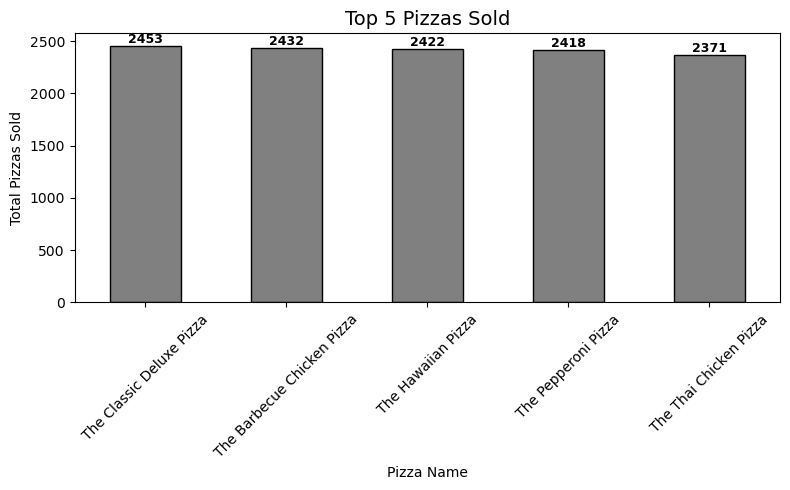

In [37]:
pizzas_by_name = df.groupby('pizza_name')['quantity'].sum()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar', figsize=(8,5), color='grey', edgecolor='black')

plt.title("Top 5 Pizzas Sold", fontsize=14)
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

# Hiển thị số lượng trên từng cột
for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
